### Load Data and Libraries

In [28]:
from Bio import SearchIO
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline


num_hit = 0
#now parse the output
hit_list = []
hit_ids = []
counts = []
qnames = []
with open('overlap_hmm_blast.txt', 'r') as input:
    for qresult in SearchIO.parse(input, 'hmmer3-tab'):
        query_id = qresult.id  #sequence ID from fasta
        qnames.append(query_id)
        hits = qresult.hits
        hit_ids = hit_ids+qresult.hit_keys
        hit_list.append(hits)
        num_hits = len(hits)
        counts.append(num_hits)
        num_hit = num_hit + num_hits
print(num_hit)

2181


### Hits by HMM Model

In [29]:
df_query = pd.DataFrame({'Names': qnames, 
                   'Hit Counts': counts}, columns=['Names','Hit Counts'])
df_query = df_query.sort_values(by=['Hit Counts'], ascending=False)
top_n = df_query.head(10)

In [30]:
top_n

,Names,Hit Counts
198,AAA_21,66
68,SMC_N,64
3,Response_reg,62
102,Autotransporter,43
220,LRR_8,40
192,AAA_15,36
203,TPR_16,36
71,HATPase_c,35
225,TPR_19,35
208,LRR_6,35


In [31]:
## Number of VOGS identified
y = df_query['Names'].str.contains('VOG')
df2=df_query[y]
df2.head(7)

,Names,Hit Counts
235,VOG0855,8
237,VOG4609,3
234,VOG0514,1
236,VOG2188,1
238,VOG5126,1


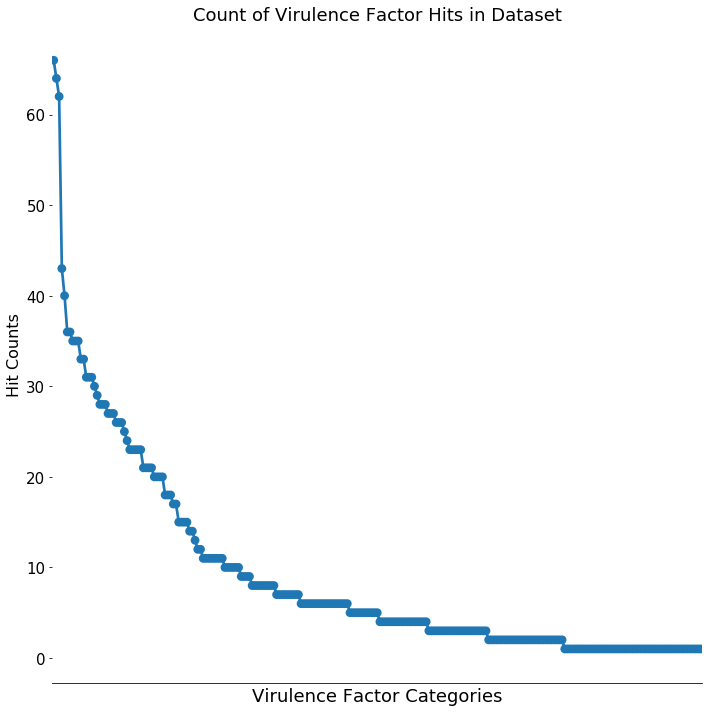

In [32]:
f = plt.subplots(figsize=(10, 10))
sns.pointplot(x='Names', y='Hit Counts', data=df_query, markers=["o"], linestyles=["-"])
plt.yticks(fontsize=15)
plt.xticks([])
plt.title('Count of Virulence Factor Hits in Dataset', fontsize=18)
plt.xlabel('Virulence Factor Categories', fontsize=18)
plt.ylabel('Hit Counts', fontsize=16)
plt.tight_layout()
sns.despine(trim=True, left=True)
plt.savefig('HMM_Hit_Counts.jpg', transparent=True)

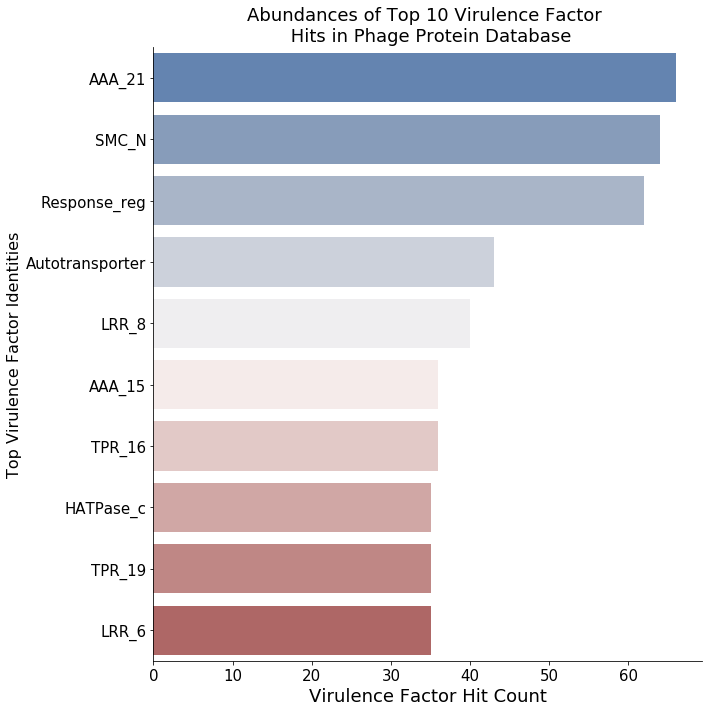

In [33]:
### Top N Hits
sns.factorplot(x="Hit Counts", y="Names", data=top_n, kind="bar", palette="vlag", size=10)


#axes = plt.gca()
#axes.set_xlim([0,10])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Abundances of Top 10 Virulence Factor \n Hits in Phage Protein Database', fontsize=18)
plt.xlabel('Virulence Factor Hit Count', fontsize=18)
plt.ylabel('Top Virulence Factor Identities', fontsize=16)
plt.tight_layout()

#sns.despine(trim=True, left=True)
plt.savefig('Top_VF_Hit_Plot.jpg', transparent=True)